In [8]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

In [9]:
DSN = 'scada-lgw.c1odobldq4uq.us-west-2.rds.amazonaws.com'
username = 'admin'
password = 'OpsR3porting!'

conn = pyodbc.connect('DRIVER=SQL Server;SERVER=%s;UID=%s;PWD=%s' %(DSN, username, password))

In [48]:
query = 'select top(1000) * from [wpsHistory_CASJOSQL01].[dbo].[tblSCTurbine]' #ORDER BY TimeStamp DESC

df_turbine = pd.read_sql(query, conn)

In [9]:
# Another table to combine

#query = 'select top(10) * from [wpsHistory_CASJOSQL01].[dbo].[tblSCTurDigiIn] ORDER BY TimeStamp DESC'

#df_DigiIn = pd.read_sql(query, conn)

# Combine tables
#df_combined = df_turbine.join(df_DigiIn, on='TimeStamp', lsuffix='_turbine', rsuffix='_DigiIn')
#df_combined

In [ ]:
df_turbine['date'] = df_turbine['TimeStamp'].dt.date
#df_turbine['date']

In [54]:
df_turbine_site = df_turbine.groupby(by=['date']).median()

In [55]:
df_turbine_site

,StationId,wtc_SecAnemo_min,wtc_SecAnemo_max,wtc_SecAnemo_mean,wtc_SecAnemo_stddev,wtc_YawPos_min,wtc_YawPos_max,wtc_YawPos_mean,wtc_YawPos_stddev,wtc_GenRpm_min,...,wtc_SeWindSp_mean,wtc_SeWindSp_stddev,wtc_AcWindSp_min,wtc_AcWindSp_max,wtc_AcWindSp_mean,wtc_AcWindSp_stddev,wtc_NacelPos_min,wtc_NacelPos_max,wtc_NacelPos_mean,wtc_NacelPos_stddev
date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,2304171,10.4,20.0,15.202195,1.533460,167.399994,171.000000,169.313858,0.957883,1414.300049,...,15.203662,1.537471,8.7,19.799999,14.993261,1.745254,167.399994,171.000000,169.313934,0.957856
2014-02-17,2304171,7.7,11.1,9.233048,0.480433,182.199997,184.600006,183.355484,0.936022,1395.300049,...,9.235517,0.479630,5.9,11.600000,8.452577,0.957633,182.199997,184.600006,183.355331,0.935999
2014-02-19,2304170,7.6,11.8,9.572886,0.617389,282.700012,284.799988,283.703278,0.774072,1401.850037,...,9.579573,0.617412,5.9,12.600000,9.024637,1.085466,282.700012,284.799988,283.703186,0.774140


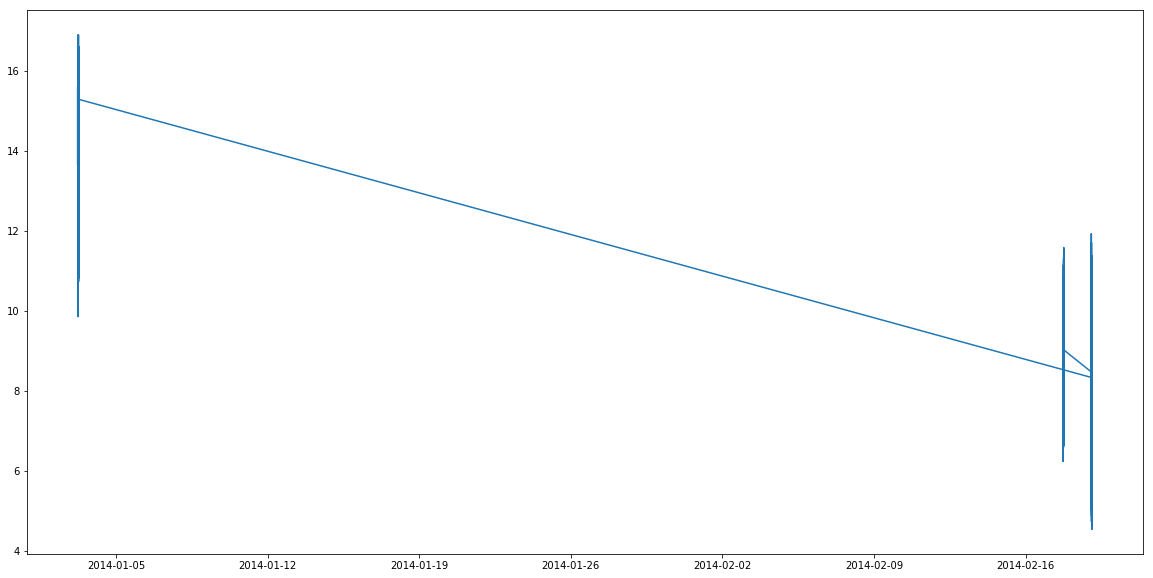

In [58]:
plt.figure(figsize=(20,10))
plt.plot(df_turbine['TimeStamp'], df_turbine['wtc_AcWindSp_mean'])